In [1]:
import os
print(os.listdir('../Ai-Ml/trainingSet'))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#DL
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [6]:
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn

In [7]:
import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [8]:
#Prepare data
X = []#contains images
Z = []#contains labels for images
IMG_SIZE = 28
ZERO_DIR = '../Ai-Ml/trainingSet/0'
ONE_DIR = '../Ai-Ml/trainingSet/1'
TWO_DIR = '../Ai-Ml/trainingSet/2'
THREE_DIR = '../Ai-Ml/trainingSet/3'
FOUR_DIR = '../Ai-Ml/trainingSet/4'
FIVE_DIR = '../Ai-Ml/trainingSet/5'
SIX_DIR = '../Ai-Ml/trainingSet/6'
SEVEN_DIR = '../Ai-Ml/trainingSet/7'
EIGHT_DIR = '../Ai-Ml/trainingSet/8'
NINE_DIR = '../Ai-Ml/trainingSet/9'

In [9]:
def assign_label(img, digit_type):
    return digit_type

In [10]:
def make_train_data(digit_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, digit_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [11]:
make_train_data('0', ZERO_DIR)
print(len(X))

100%|██████████| 4132/4132 [00:00<00:00, 6974.86it/s]

4132


In [12]:
make_train_data('1', ONE_DIR)
print(len(X))

100%|██████████| 4684/4684 [00:00<00:00, 7248.52it/s]

8816


In [13]:
make_train_data('2', TWO_DIR)
print(len(X))

100%|██████████| 4177/4177 [00:00<00:00, 6899.66it/s]

12993


In [14]:
make_train_data('3', THREE_DIR)
print(len(X))

100%|██████████| 4351/4351 [00:00<00:00, 7169.12it/s]

17344


In [15]:
make_train_data('4', FOUR_DIR)
print(len(X))

100%|██████████| 4072/4072 [00:00<00:00, 6997.04it/s]

21416


In [16]:
make_train_data('5', FIVE_DIR)
print(len(X))

100%|██████████| 3795/3795 [00:00<00:00, 7225.03it/s]

25211


In [17]:
make_train_data('6', SIX_DIR)
print(len(X))

100%|██████████| 4137/4137 [00:00<00:00, 4290.74it/s]

29348


In [18]:
make_train_data('7', SEVEN_DIR)
print(len(X))

100%|██████████| 4401/4401 [00:01<00:00, 3422.70it/s]

33749


In [19]:
make_train_data('8', EIGHT_DIR)
print(len(X))

100%|██████████| 4063/4063 [00:00<00:00, 4107.11it/s]

37812


In [20]:
make_train_data('9', NINE_DIR)
print(len(X))

100%|██████████| 4188/4188 [00:00<00:00, 4440.82it/s]

42000


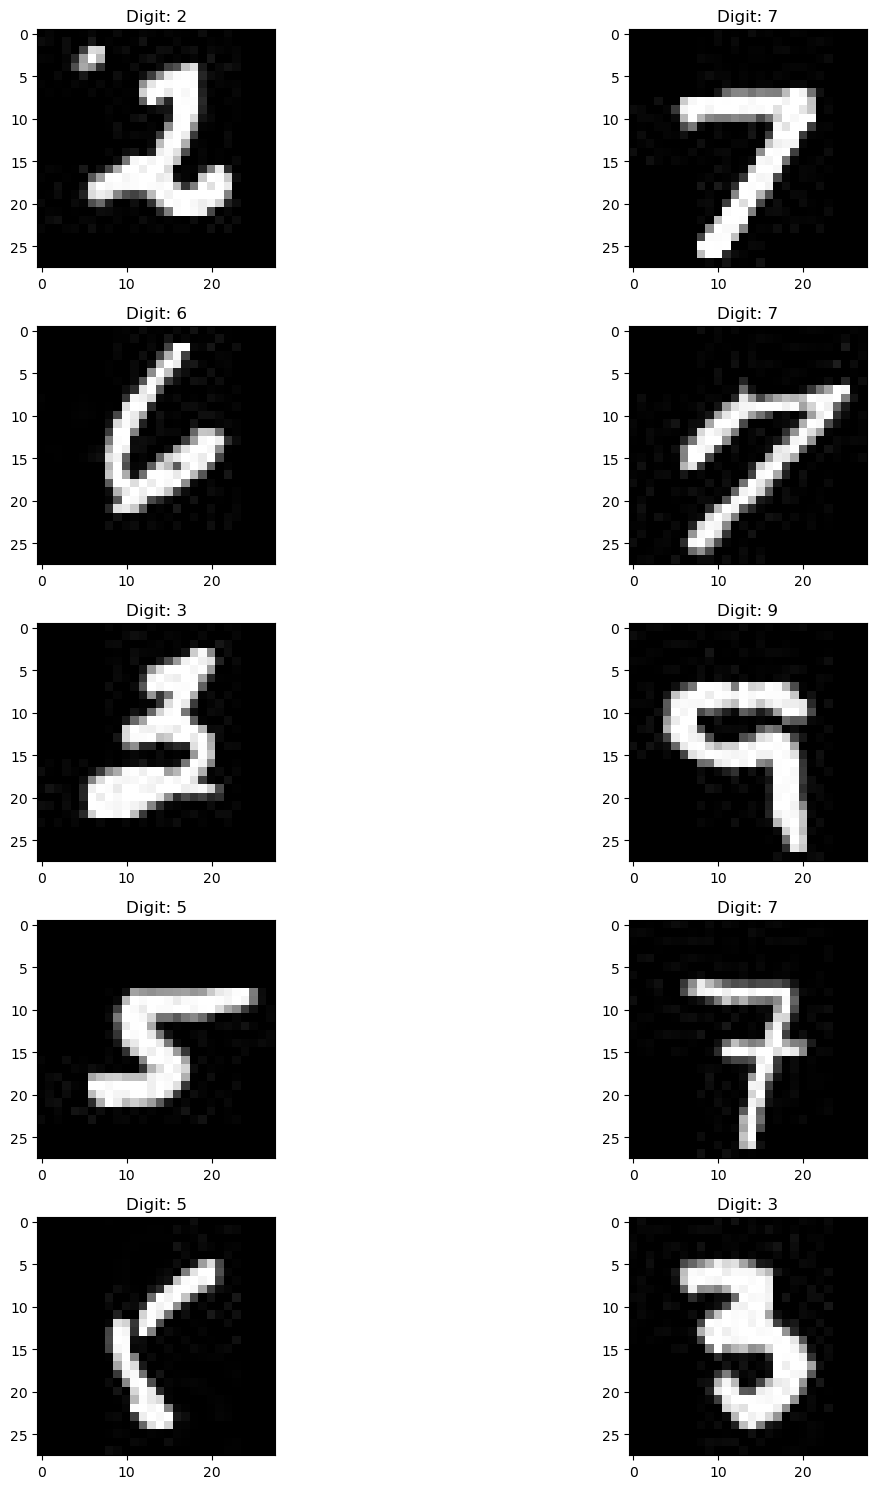

In [21]:
#Visualizingg Random images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Digit: '+Z[l])
        
plt.tight_layout()

In [22]:
#LabelEncoding
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X = X/255

In [23]:
#Split the data
x_train,x_test,y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state = 42)

In [24]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [25]:
#Build the CNN
cnn = tf.keras.models.Sequential()

In [26]:
cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))
cnn.add(Dense(10, activation= "softmax"))

In [27]:
#Learning Rate (LR)
batch_size = 128
epochs = 50
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience = 1,verbose = 1, factor = 0.1)

In [28]:
#-Overfitting
datagen = ImageDataGenerator(featurewise_center = False, samplewise_center = False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=10, zoom_range = 0.1, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, vertical_flip=False)
datagen.fit(x_train)

In [ ]:
#Compiling
cnn.compile(optimizer = Adam(lr = 0.001), loss='categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
#Fitting & Predictions
History = cnn.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

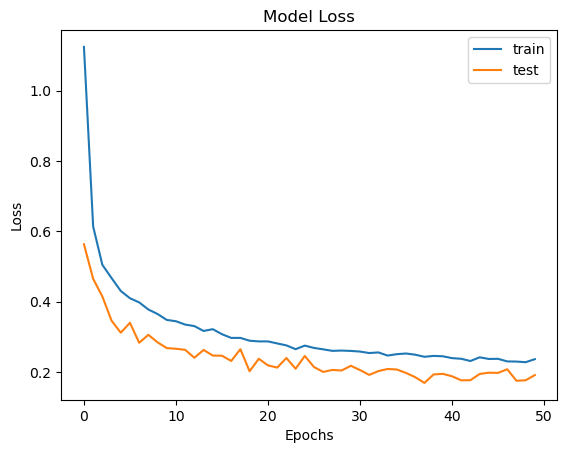

In [32]:
#Evaluationg
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()


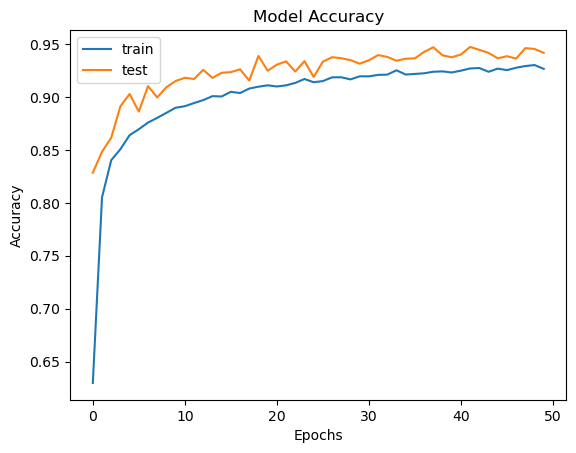

In [33]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()